In [2]:
import pyhf
import pyhf.experimental.modifiers


In [3]:
new_params = {
    "m1": {"inits": (1.0,), "bounds": ((-5.0, 5.0),)},
    "m2": {"inits": (1.0,), "bounds": ((-5.0, 5.0),)},
}
expanded_pyhf = pyhf.experimental.modifiers.add_custom_modifier(
    "customfunc", ["m1", "m2"], new_params
)
model = pyhf.Model(
    {
        "channels": [
            {
                "name": "singlechannel",
                "samples": [
                    {
                        "name": "signal",
                        "data": [10] * 20,
                        "modifiers": [
                            {
                                "name": "f2",
                                "type": "customfunc",
                                "data": {"expr": "m1"},
                            },
                        ],
                    },
                    {
                        "name": "background",
                        "data": [100] * 20,
                        "modifiers": [
                            {
                                "name": "f1",
                                "type": "customfunc",
                                "data": {"expr": "m1+(m2**2)"},
                            },
                        ],
                    },
                ],
            }
        ]
    },
    modifier_set=expanded_pyhf,
    poi_name="m1",
    validate=False,
    batch_size=1,
)


{'name': 'f1', 'type': 'customfunc', 'data': {'expr': 'm1+(m2**2)'}}
{'name': 'f2', 'type': 'customfunc', 'data': {'expr': 'm1'}}


In [4]:
model.expected_actualdata([[1.0, 2.0]])

deps (2, 1)


array([[510., 510., 510., 510., 510., 510., 510., 510., 510., 510., 510.,
        510., 510., 510., 510., 510., 510., 510., 510., 510.]])

In [6]:
import numpy as np

In [16]:
data = model.expected_actualdata([[1.0, 2.0]]) + np.random.randint(
    low=-10, high=10, size=20
)

test_mu = 1

CLs_obs, CLs_exp = pyhf.infer.hypotest(
    test_mu, data, model, test_stat="q", return_expected=True
)

print(f"Observed: {CLs_obs}, Expected: {CLs_exp}")


deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps

In [13]:
print(f"  channels: {model.config.channels}")
print(f"     nbins: {model.config.channel_nbins}")
print(f"   samples: {model.config.samples}")
print(f" modifiers: {model.config.modifiers}")
print(f"parameters: {model.config.parameters}")
print(f"  nauxdata: {model.config.nauxdata}")
print(f"   auxdata: {model.config.auxdata}")

  channels: ['singlechannel']
     nbins: {'singlechannel': 20}
   samples: ['background', 'signal']
 modifiers: [('f1', 'customfunc'), ('f2', 'customfunc')]
parameters: ['m1', 'm2']
  nauxdata: 0
   auxdata: []


In [17]:
pyhf.infer.mle.fit(data=data, pdf=model)

deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)
deps (2, 1)


array([4.50996661, 0.38083677])

In [10]:
CLs_obs, CLs_exp = pyhf.infer.hypotest(
    1.0,  # null hypothesis
    [53.0, 65.0] + model.config.auxdata,
    model,
    test_stat="q",
    return_expected_set=True,
)
print(f"      Observed CLs: {CLs_obs:.4f}")
for expected_value, n_sigma in zip(CLs_exp, np.arange(-2, 3)):
    print(f"Expected CLs({n_sigma:2d} σ): {expected_value:.4f}")

qmu test statistic used for fit configuration with POI bounded at zero.
Use the qmu_tilde test statistic (pyhf.infer.test_statistics.qmu_tilde) instead.
qmu test statistic used for fit configuration with POI bounded at zero.
Use the qmu_tilde test statistic (pyhf.infer.test_statistics.qmu_tilde) instead.


      Observed CLs: 0.4957
Expected CLs(-2 σ): 0.0832
Expected CLs(-1 σ): 0.1828
Expected CLs( 0 σ): 0.3705
Expected CLs( 1 σ): 0.6437
Expected CLs( 2 σ): 0.8854


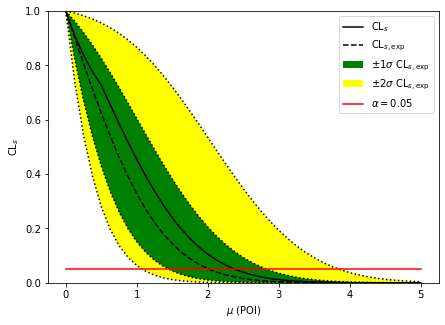

In [18]:
import pyhf
import numpy as np
import matplotlib.pyplot as plt
from pyhf.contrib.viz import brazil

pyhf.set_backend("numpy")
model = pyhf.simplemodels.uncorrelated_background(
    signal=[10.0], bkg=[50.0], bkg_uncertainty=[7.0]
)
data = [55.0] + model.config.auxdata

poi_vals = np.linspace(0, 5, 41)
results = [
    pyhf.infer.hypotest(
        test_poi, data, model, test_stat="qtilde", return_expected_set=True
    )
    for test_poi in poi_vals
]

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
brazil.plot_results(poi_vals, results, ax=ax)
fig.show()